# Data wrangling and Analyzing Project

##  Data Focus: WeRateDogs

##### By Titilope Onabajo

## Table of Contents
- [Introduction](#intro)
- [Libraries that would be deployed](#libraries)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing](#storing)
- [Analyzing, and Visualizing](#analyze)
   - [Insight one & visualization](#one)
   - [Insight two & visualization](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)
   - [Insight five & visualization](#five)

<a id='intro'></a>
## Introduction

The dataset to be wrangled( and analyzed and visualized) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs), which is a Twitter account that rates people's dogs with a humorous comment about the dog.

The ratings has a common numerator of 10. However, almost all the ratings were greater than 10 i.e; 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The twitter archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

<a id='libraries'></a>

## Libraries that would be deployed

In [1]:
# Downloading and importing all the necessary libraries to complete the project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## import tweepy
## from tweepy import OAuthHandler
from timeit import default_timer as timer
import re
import os
import json
import requests
from PIL import Image
from io import BytesIO
import time
import datetime
from timeit import default_timer as timer
import warnings
warnings.simplefilter('ignore')
from functools import reduce
## from jupyterthemes import jtplot
## jtplot.style(theme='onedork')

%matplotlib inline

<a id='gather'></a>

## Data Gathering
1. Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv


2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Twitter API & JSON: Due to technical reasons this could not be assessed through twitter's API and tweepy, hence the file was loaded into jupyter using the `tweet-json.txt`


In the cells below, **all** three pieces of data for this project will be gathered and loaded in the notebook. 

In [2]:
## this code runs exactly the same with the one below, except that this can work without data

df_archive = pd.read_csv('twitter_archive_enhanced.csv')

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**1. Twitter archive file: Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

###### this code won't run if you are not connected to the internet.

##### Request csv file from the url
url = "https://video.udacity-data.com/topher/2018/November/5bf60fbf_twitter-archive-enhanced/twitter-archive-enhanced.csv"
response = requests.get(url)

##### Write the response into file
with open('twitter_archive_enhanced.csv', mode='wb') as file:
    file.write(response.content)
    
##### Load csv data into pandas dataframe
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [3]:
## for offline use, works the same way with the one below 

df_image = pd.read_csv('image-predictions.tsv', sep='\t')

df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### this code won't run if you are not connected to the internet.

###### URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

###### Write the response into file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

###### Load tsv data into pandas dataframe
df_image = pd.read_csv('image-predictions.tsv', sep='\t' )

**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

## auth = OAuthHandler(consumer_key, consumer_secret)
### auth.set_access_token(access_token, access_secret)

### api = tweepy.API(auth, wait_on_rate_limit=True)
                

tweet_ids = df_archive .tweet_id.values
len(tweet_ids)

2356

In [5]:
df_list = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = (json.loads(line))
        
        df_list.append({'tweet_id': data['id'],
                       'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'created_at': data['created_at']
                       })
        
        
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])

In [6]:
df_tweet.to_csv('tweet_API_info.csv', index=False)

<a id='assess'></a>
###  Assessing Data
> **Types of assessment:**
> - <a href='#visual'>Visual</a>
> - <a href='#prog'>Programmatic</a>


Assessing data would be with the intent to identify:

* 1.  Where we have dirty data: such as **Missing, duplicated, or incorrect data.**
* 2.  Where we have untidy data: such as **Structural issues.**

>At least, eight (8) data quality issues and two (2) tidiness issues are to be  detected, which will then proceed to clean up identified issues under the  **DATA CLEANING** section 

<a id='visual'></a>
### Visual assessment

In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [12]:
df_tweet.tail()

,tweet_id,retweet_count,favorite_count,created_at
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015
2353,666020888022790149,532,2535,Sun Nov 15 22:32:08 +0000 2015


<a id='prog'></a>
### Programmatic assessment

In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [18]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Assessment Summary

<a id='quality'></a>
### Quality issues

##### `df_archive` Table
<a href='#1'>(1)</a> Keep original ratings (no retweets) that have images

<a href='#2'>(2)</a>- Delete columns that won't be used for analysis, e.g: __in_reply_to_status_id__, __in_reply_to_user_id__, __retweeted_status_id__, __retweeted_status_user_id__, __retweeted_status_timestamp__, and __expanded_urls__.

<a href='#3'>(3)</a>  Column **tweet_id** in df_archive has its data type as int64 of which the correct datatype should be object, Also column **timestamp's** datatype should be a datetime64.  The **tweet_id** column in df_image should be dtype object instead of int64, 

<a href='#4'>(4)</a> Some dog names under the `name` column do not lok like valid names. Many missing names from the list as a result of being either __'None'__, and random names like **'a'** and __'an'__ .

<a href='#5'>(5)</a> Make the source column readable by replacing the urls in it by the source name and change its datatype to category.

#### `df_image` Table
<a href='#6'>(6)</a> Some dog breed name in columns **p1**, **p2**, and **p3** starts with Upper case, while some start with lower case.

<a href='#7'>(7)</a> Certain dog breed names have their seperators to be underscore '_' instead of space.

#### `df_tweet` Table
<a href='#8'>(8)</a>  Column **tweet_id** in df_archive has its data type as int64 of which the correct datatype should be object

<a id='tidines'></a>

### Tidiness issues

> - 1. Duplicate column names present in `archive`, `img_pred` and `retweet_favorite_count`.

> - 2.  Missing information for dog stages; Each category in Stages of dog as separate column : `doggo`, `floofer`, `pupper`, `puppo`

> - 3. All tables should be part of one dataset.


<a id='clean'></a>

## Cleaning Data
In this section, I will proceed to clean **all** of the issues identified in the assessment summary above. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
# Make a copy of three dataframes

df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

<a id='1'></a>
### Issue 1
#### Define : 
Drop observations in `archive_copy` for reply and retweet, by deleting the rows with values present in `in_reply_to_status_id` and `retweeted_status_id`
#### Clean :

In [20]:
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_user_id'])]

In [21]:
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['in_reply_to_status_id'])]

#### Test

In [22]:

print(sum(df_archive_clean.retweeted_status_user_id.value_counts()))

0


In [23]:
print(sum(df_archive_clean.in_reply_to_status_id.value_counts()))

0


In [24]:
assert df_archive_clean.in_reply_to_status_id.isnull().all() == True

In [25]:
# Rows after drop
df_archive_clean.shape

(2097, 17)

<a id='2'></a>

### Issue #2:

#### Define:
Drop columns in `df_archive_copy` dataframe : `retweeted_status_id` , `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`


#### Code

In [26]:
drop_col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
           'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls']

In [27]:
df_archive_clean.drop(drop_col, axis = 1, inplace=True)

#### Test

In [28]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<a id='3'></a>

### Issue #3:

#### Define:  In df_archive table; change data type of Column *tweet_id* from int64 to object, and datatype of *timestamp* from object to datatime.

#### In df_image; change datatype of *tweet_id* from int to object

#### Code

In [29]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)

#### Test

In [30]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.6+ KB


In [31]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id='4'></a>

### Issue #4:


#### Define: Merge each category in stages of dog `doggo`, `floofer`, `pupper`, `puppo` as one column in the df_archive_clean table

#### Drop `doggo`, `floofer`, `pupper`, `puppo`


#### Code

In [32]:
df_archive_clean = pd.melt(df_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'source',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='breed', value_name='dog_cat')


df_archive_clean = df_archive_clean.drop('breed', 1)

In [33]:

df_archive_clean = df_archive_clean.sort_values('dog_cat').drop_duplicates(subset='tweet_id', 
                                                                           keep='last')

#### Test

In [34]:
df_archive_clean['dog_cat'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_cat, dtype: int64

In [35]:
df_archive_clean.dog_cat = df_archive_clean.dog_cat.astype('category')

In [36]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_cat             2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 133.3+ KB


In [37]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_cat
2021,667405339315146752,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None
2020,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,None,None
2019,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,10,10,None,None
2018,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2017,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None


<a id='5'></a>

### Issue #5

#### Define: Some dog names under the `name` column do not lok like valid names. Many missing names from the list as a result of being either __'None'__, and random names like **'a'** and __'an'__ .

#### Replace these invalid names with None

#### Code

In [38]:
df_archive_clean.name = df_archive_clean.name.apply(lambda x : 'None' if x[0].islower() else x)

#### Test

In [39]:
df_archive_clean.name.value_counts()

None        707
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Terrance      1
Jaspers       1
Clarq         1
Ralf          1
Stuart        1
Name: name, Length: 930, dtype: int64

<a id='6'></a>

### Issue #6:


#### Define: Some dog breed name in columns p1, p2, and p3 starts with Upper case, while some start with lower case, this can be corrected by maintaining a standard name system, and then create a new column for dog type and confidence level from p1, p2, p3


#### Code

In [40]:
#capitalizing by using the str.title function

df_image_clean.p1 = df_image_clean.p1.str.title()
df_image_clean.p2 = df_image_clean.p2.str.title()
df_image_clean.p3 = df_image_clean.p3.str.title()

In [41]:
df_image_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman


In [42]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists

dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(df_image_clean):
    if df_image_clean['p1_dog'] == True:
        dog_type.append(df_image_clean['p1'])
        confidence_list.append(df_image_clean['p1_conf'])
    elif df_image_clean['p2_dog'] == True:
        dog_type.append(df_image_clean['p2'])
        confidence_list.append(df_image_clean['p2_conf'])
    elif df_image_clean['p3_dog'] == True:
        dog_type.append(df_image_clean['p3'])
        confidence_list.append(df_image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
df_image_clean.apply(image, axis=1)

#create new columns
df_image_clean['dog_type'] = dog_type
df_image_clean['confidence_list'] = confidence_list

In [43]:
#drop rows that has prediction_list 'error'
df_image_clean = df_image_clean[df_image_clean['dog_type'] != 'Error']

#TEST: 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


In [44]:
#CODE: print list of image_prediction columns
print(list(df_image_clean))

#Delete columns
df_image_clean = df_image_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(df_image_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [45]:
df_image_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,0.560311


<a id='7'></a>

### Issue #7:


#### Define: Replace underscore '_'  with space in dog type names using the replace function


#### Code

In [46]:
df_image_clean.dog_type = df_image_clean.dog_type.str.replace('_',' ')

In [47]:
df_image_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


<a id='8'></a>

### Issue #8:


#### Define:  In the df_tweet table, column **id_str** will renamed to **tweet_id** so has to maintain consistent data names, this will be done using the rename function


#### Code

In [48]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

In [49]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


<a id='9'></a>

### Issue #9:


#### Define: Make the source column readable by replacing the urls in it by the source name and change its datatype to category.


#### Code

In [50]:
#the source column has different values, thus assigning each value to a different variable

iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
Vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
Twitter_Web = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
Twitter_Deck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [51]:
#using the variables created above in the replace function 

df_archive_clean.source = df_archive_clean.source.replace(iphone, 'Twitter for iPhone')
df_archive_clean.source = df_archive_clean.source.replace(Vine, 'Twitter Vine')
df_archive_clean.source = df_archive_clean.source.replace(Twitter_Web, 'Twitter Web')
df_archive_clean.source = df_archive_clean.source.replace(Twitter_Deck, 'TweetDeck')

In [52]:
df_archive_clean.source.value_counts()

Twitter for iPhone    1964
Twitter Vine            91
Twitter Web             31
TweetDeck               11
Name: source, dtype: int64

In [53]:
df_archive_clean.source = df_archive_clean.source.astype('category')

In [54]:
df_archive_clean.source.head(5)

2021    Twitter for iPhone
2020    Twitter for iPhone
2019    Twitter for iPhone
2018    Twitter for iPhone
2017           Twitter Web
Name: source, dtype: category
Categories (4, object): ['TweetDeck', 'Twitter Vine', 'Twitter Web', 'Twitter for iPhone']

<a id='10'></a>

### Issue #10:


#### Define: Correct inconsistencies in the `rating_numerator` and  `rating_denominator` column in the `df_archive`.


#### Code

In [55]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)

In [56]:
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)

In [57]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   float64            
 6   name                2097 non-null   object             
 7   dog_cat             2097 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 119.2+ KB


<a id='storing'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
df_archive_clean.to_csv('df_archive_clean.csv', index = False)
df_image_clean.to_csv('df_image_clean.csv', index = False)
df_tweet_clean.to_csv('df_tweet_clean.csv', index = False)

#### merging the dataframes into single master dataframe

In [59]:
df_new_archive = df_archive_clean.merge(df_image_clean, on = 'tweet_id', how = 'inner')

In [60]:
df_new_archive.shape

(1666, 11)

In [61]:
twitter_archive_master = pd.merge(df_new_archive, df_tweet_clean, on = 'tweet_id', how = 'left')

In [62]:
twitter_archive_master .head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_cat,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,created_at
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint Bernard,0.381377,234,489,Thu Nov 19 18:13:27 +0000 2015
1,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326,Thu Nov 19 20:14:03 +0000 2015
2,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador Retriever,0.82567,96,327,Thu Nov 19 21:22:56 +0000 2015
3,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan Terrier,0.676376,66,203,Thu Nov 19 21:32:34 +0000 2015
4,667470559035432960,2015-11-19 22:32:36+00:00,Twitter Web,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy Poodle,0.304175,102,273,Thu Nov 19 22:32:36 +0000 2015


In [63]:
twitter_archive_master.shape

(1666, 14)

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   category           
 3   text                1666 non-null   object             
 4   rating_numerator    1666 non-null   float64            
 5   rating_denominator  1666 non-null   float64            
 6   name                1666 non-null   object             
 7   dog_cat             1666 non-null   category           
 8   jpg_url             1666 non-null   object             
 9   dog_type            1666 non-null   object             
 10  confidence_list     1666 non-null   object             
 11  retweet_count       1666 non-null   int64              
 12  favorite_count      1666 non-null 

In [65]:
#using the apply function, applying the strftime function to each value of the timestamp column in each row

twitter_archive_master['date'] = twitter_archive_master['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
twitter_archive_master['time'] = twitter_archive_master['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
twitter_archive_master.date = pd.to_datetime(twitter_archive_master.date, dayfirst = True)

In [66]:
twitter_archive_master = twitter_archive_master.drop('timestamp', axis = 1)

In [67]:
twitter_archive_master.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_cat,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,created_at,date,time
0,667405339315146752,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint Bernard,0.381377,234,489,Thu Nov 19 18:13:27 +0000 2015,2015-11-19,18:13:27
1,667435689202614272,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326,Thu Nov 19 20:14:03 +0000 2015,2015-11-19,20:14:03
2,667453023279554560,Twitter Web,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador Retriever,0.82567,96,327,Thu Nov 19 21:22:56 +0000 2015,2015-11-19,21:22:56
3,667455448082227200,Twitter Web,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan Terrier,0.676376,66,203,Thu Nov 19 21:32:34 +0000 2015,2015-11-19,21:32:34
4,667470559035432960,Twitter Web,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy Poodle,0.304175,102,273,Thu Nov 19 22:32:36 +0000 2015,2015-11-19,22:32:36


<a id='analyze'></a>


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [74]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_master['rating'] = 10 * twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator'].astype(float)

#TEST
twitter_archive_master.sample(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_cat,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,created_at,time,rating
date,,,,,,,,,,,,,,,
2015-11-21,667924896115245057,Twitter for iPhone,This is Jiminy. He has always wanted to be a c...,9.0,10.0,Jiminy,None,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,Labrador Retriever,0.209051,119,318,Sat Nov 21 04:37:59 +0000 2015,04:37:59,9.0
2015-12-02,672125275208069120,Twitter for iPhone,This is just impressive I have nothing else to...,11.0,10.0,None,None,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,Golden Retriever,0.000087,1253,2578,Wed Dec 02 18:48:47 +0000 2015,18:48:47,11.0
2017-03-13,841314665196081154,Twitter Web,This is Max. There's no way in h*ck you're tak...,13.0,10.0,Max,None,https://pbs.twimg.com/ext_tw_video_thumb/84131...,Afghan Hound,0.903712,5312,17305,Mon Mar 13 15:47:01 +0000 2017,15:47:01,13.0
2016-01-09,685943807276412928,Twitter for iPhone,This is the newly formed pupper a capella grou...,8.0,10.0,None,pupper,https://pbs.twimg.com/ext_tw_video_thumb/68594...,Papillon,0.200812,696,1801,Sat Jan 09 21:58:42 +0000 2016,21:58:42,8.0
2016-09-22,779056095788752897,Twitter for iPhone,Everybody drop what you're doing and look at t...,13.0,10.0,None,None,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,Chihuahua,0.721188,5247,16500,Thu Sep 22 20:33:42 +0000 2016,20:33:42,13.0


In [68]:
twitter_archive_master.groupby(['dog_cat'])['rating_numerator'].mean().sort_values(ascending = False)

dog_cat
puppo      12.000000
doggo      11.925926
floofer    11.875000
None       11.406671
pupper     10.971098
Name: rating_numerator, dtype: float64

In [69]:
twitter_archive_master.groupby('dog_cat')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_cat,,,,,,,,
None,1409.0,8844.678495,11487.727319,81.0,1914.00,4195.0,11469.00,107956.0
doggo,54.0,19404.240741,23425.592219,2593.0,7928.25,11941.5,20616.25,131075.0
floofer,8.0,13701.375000,10516.926166,2262.0,5560.75,11879.0,18623.25,33345.0
pupper,173.0,7838.526012,11562.632747,693.0,2467.00,3419.0,8092.00,106827.0
puppo,22.0,22657.181818,28587.256826,3277.0,7043.50,13387.5,19691.25,132810.0


<a id='one'></a>


### Insights One: Trend of retweet and Favourite Over time

In [70]:
#the datatype of date is an object as opposed to datetime that I converted it to earlier, so I will just convert it back

twitter_archive_master.date = pd.to_datetime(twitter_archive_master.date)



#setting the date column as the index to visualize its relationship with other features
twitter_archive_master.set_index('date', inplace = True)

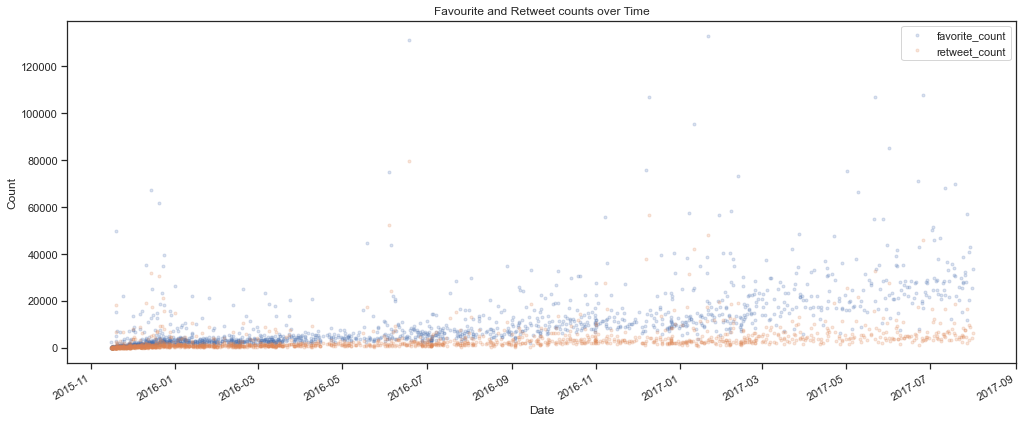

In [163]:
twitter_archive_master[['favorite_count', 'retweet_count']].plot(style = '.', alpha = 0.2)
plt.title('Favourite and Retweet counts over Time')
plt.xlabel('Date')
plt.ylabel('Count')
sns.set(style="whitegrid",font_scale=1.2)

sca = plt.gcf() 
sca.savefig('output5.png',bbox_inches='tight');

sns.set(rc={'figure.figsize':(17,7)})

#### Insight 1:

This was carried out to show if there is a relationship between the number of favorite counts and the number of retweets over the time under review. 
The graph shows that the favorite and retweet count increased in tandem with each other over time

<a id='two'></a>


### Insights Two: Trend of retweet and Favourite

In [72]:
tweets_per_period = twitter_archive_master.groupby('date').count().reset_index()
tweets_per_period = tweets_per_period[['date', 'tweet_id']]
tweets_per_period.head()
tweets_per_period.sum()

tweet_id    1666
dtype: int64

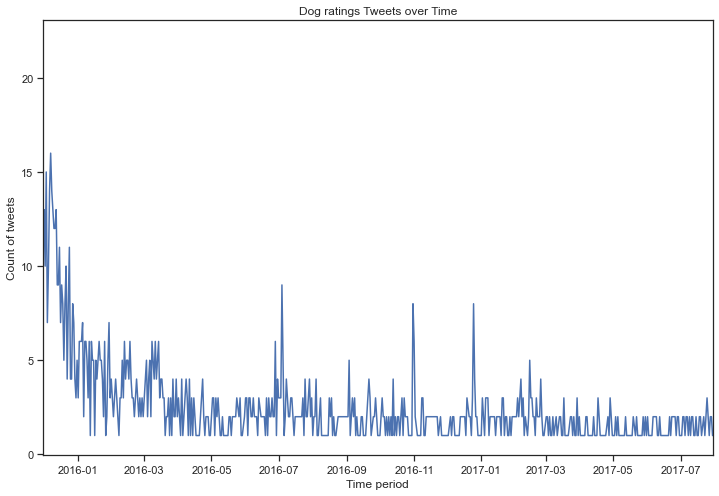

In [162]:
# Plotting time vs. tweets

plt.figure(figsize=(12, 8));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)])

plt.xlabel('Time period')
plt.ylabel('Count of tweets')
plt.title('Dog ratings Tweets over Time');
sns.set_style("ticks")

fig = plt.gcf() 
fig.savefig('output4.png',bbox_inches='tight');

plt.plot(tweets_per_period.date, tweets_per_period.tweet_id);

#### Insights 2:

This insights shows that over time (i.e between 2016-01 and 2017-07) tweet trend declined. 
This could mean that twutter users might be gradually becoming uniterested in tweeting about dog ratings and want a newer challenge.

<a id='three'></a>


### Insights Three:

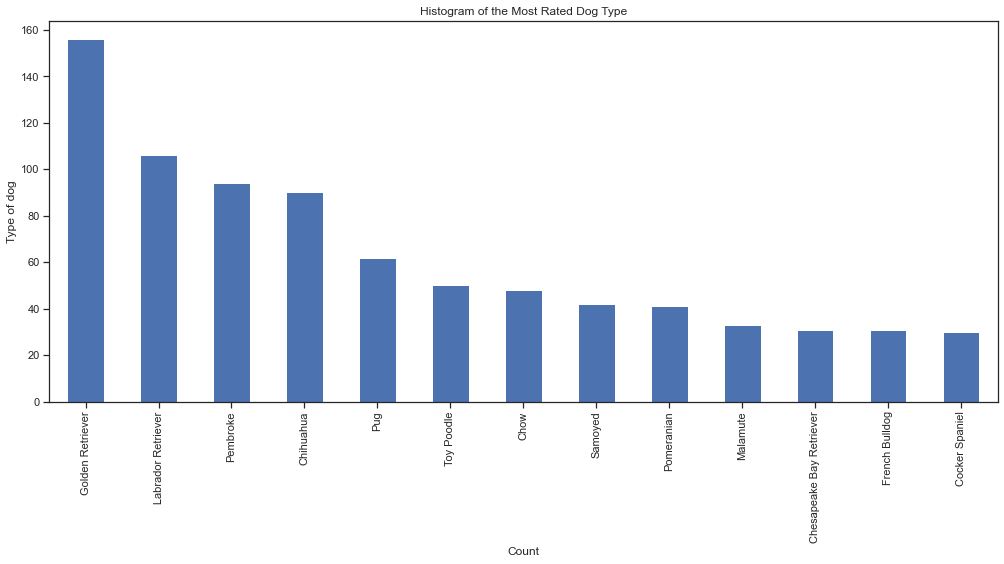

In [151]:
df_dog_type = twitter_archive_master.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('baroutput.png',bbox_inches='tight');



This insights was targeted to show the most rated dog types amidst the entire list of dog types gathered in the dataset.

This shows the top dogs from the ratings by twitter users in the WeRateDog tweets

<a id='four'></a>


### Insights Four:

In [89]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1635
Twitter Web             22
TweetDeck                9
Twitter Vine             0
Name: source, dtype: int64

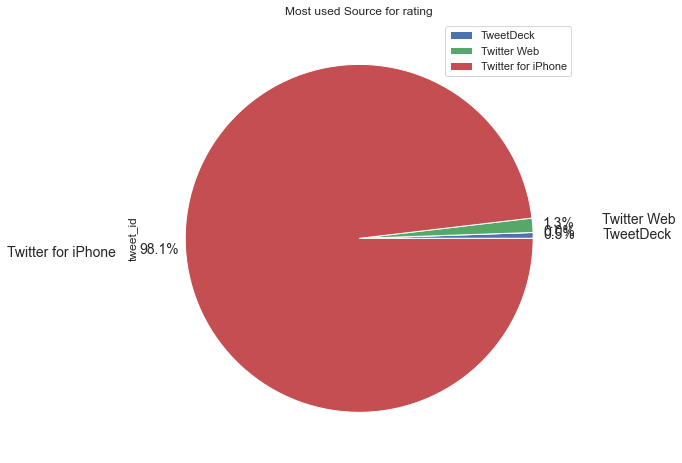

In [129]:
labels = ['Twitter for iPhone', 'Twitter Web', 'TweetDeck']

df_dog_type=twitter_archive_master.groupby('source').count()['tweet_id'].plot(kind = 'pie', 
    figsize = (13,8),fontsize=14, autopct='%1.1f%%', 
    pctdistance=1.15, labeldistance=1.40)

plt.legend(['Legend'], loc='center right'
# df_dog_type['source'].value_counts().plot(kind = 'pie')
plt.title('Most used Source for rating')


fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');
plt.legend()
plt.show()
plt.close()

#### Insights 4:

This analysis shows us that iphone represents 98.1% of twitter users that interact with the weratedog tweets, with less than 2% being accessed from twitter web and twitter deck.

<a id='five'></a>


### Insights Five:

In [134]:
df_dog_type_count = twitter_archive_master.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_cat,jpg_url,confidence_list,retweet_count,favorite_count,created_at,time,rating
dog_type,,,,,,,,,,,,,,
Afghan Hound,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American Staffordshire Terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian Terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Welsh Springer Spaniel,4,4,4,4,4,4,4,4,4,4,4,4,4,4
West Highland White Terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Whippet,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [135]:
df_dog_type_mean = twitter_archive_master.groupby('dog_type').mean()
df_dog_type_mean

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
dog_type,,,,,
Afghan Hound,9.666667,10.00,5976.000000,17326.666667,9.666667
Airedale,9.833333,10.00,1393.750000,5280.833333,9.833333
American Staffordshire Terrier,10.312500,10.00,2310.812500,9380.187500,10.312500
Appenzeller,11.000000,10.00,1458.000000,7317.500000,11.000000
Australian Terrier,11.500000,10.00,3078.500000,11127.500000,11.500000
...,...,...,...,...,...
Welsh Springer Spaniel,9.500000,10.00,1106.000000,5056.000000,9.500000
West Highland White Terrier,14.687500,13.75,1474.500000,6054.750000,10.187500
Whippet,10.181818,10.00,4840.272727,12911.454545,10.181818


In [136]:
ndf_dog_type_count = df_dog_type_count['rating']
ndf_dog_type_mean = df_dog_type_mean['rating']
ndf_dog_type_mean

dog_type
Afghan Hound                       9.666667
Airedale                           9.833333
American Staffordshire Terrier    10.312500
Appenzeller                       11.000000
Australian Terrier                11.500000
                                    ...    
Welsh Springer Spaniel             9.500000
West Highland White Terrier       10.187500
Whippet                           10.181818
Wire-Haired Fox Terrier           11.500000
Yorkshire Terrier                 10.200000
Name: rating, Length: 113, dtype: float64

In [150]:
ndf_dog_type_mean.max()

27.0

In [137]:
ndf_dog_type_mean

dog_type
Afghan Hound                       9.666667
Airedale                           9.833333
American Staffordshire Terrier    10.312500
Appenzeller                       11.000000
Australian Terrier                11.500000
                                    ...    
Welsh Springer Spaniel             9.500000
West Highland White Terrier       10.187500
Whippet                           10.181818
Wire-Haired Fox Terrier           11.500000
Yorkshire Terrier                 10.200000
Name: rating, Length: 113, dtype: float64

In [139]:
data = pd.DataFrame()
data['ndf_dog_type_count'] = ndf_dog_type_count
data['ndf_dog_type_mean'] = ndf_dog_type_mean
data

,ndf_dog_type_count,ndf_dog_type_mean
dog_type,,
Afghan Hound,3,9.666667
Airedale,12,9.833333
American Staffordshire Terrier,16,10.312500
Appenzeller,2,11.000000
Australian Terrier,2,11.500000
...,...,...
Welsh Springer Spaniel,4,9.500000
West Highland White Terrier,16,10.187500
Whippet,11,10.181818


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


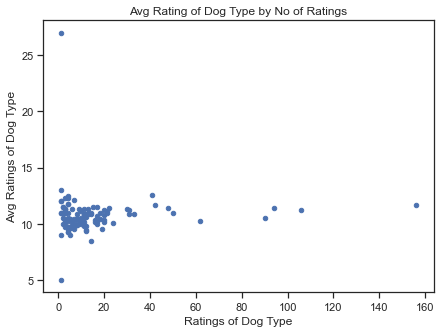

In [147]:
data.plot(x='ndf_dog_type_count', y='ndf_dog_type_mean', kind='scatter', figsize = (7,5))
plt.xlabel('Ratings of Dog Type')
plt.ylabel('Avg Ratings of Dog Type')
plt.title('Avg Rating of Dog Type by No of Ratings')

fig = plt.gcf();
fig.savefig('data_output.png',bbox_inches='tight');

#### Insights 5:

The	blue dot	 which is an outlier on	the	very right represents the dog type; golden	retriever with an average rating of 27.0 . It seems to reflect that the	golden	retriever is highly rated.